# Evaluation of results

In [1]:
import numpy as np
from scipy.optimize import minimize
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
import glob
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

## Results Using pix2pix

In [2]:
imgname = '890.jpg'
infold = '../outputs/test/images/input/'
otfold = '../outputs/test/images/output/'
trfold = '../outputs/test/images/target/'

In [3]:
temp_in = img.imread(''.join((infold, imgname)))
temp_out = img.imread(''.join((otfold, imgname)))
temp_tar = img.imread(''.join((trfold, imgname)))

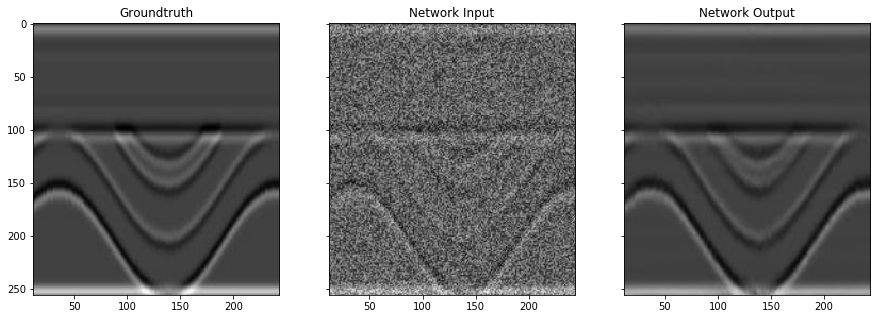

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))

ax1.imshow(temp_tar, cmap='Greys')
ax1.set_title('Groundtruth')
ax2.imshow(temp_in, cmap='Greys')
ax2.set_title('Network Input')
ax3.imshow(temp_out, cmap='Greys')
ax3.set_title('Network Output')

plt.show()

## Comparison with other denoising strategies

In [5]:
%%time

tv = denoise_tv_chambolle(temp_in, weight=0.1, multichannel=True)
bilat = denoise_bilateral(temp_in, sigma_color=0.05, sigma_spatial=15,
                multichannel=True)
wavelet = denoise_wavelet(temp_in, multichannel=True)

CPU times: user 10.1 s, sys: 8 ms, total: 10.1 s
Wall time: 10.1 s


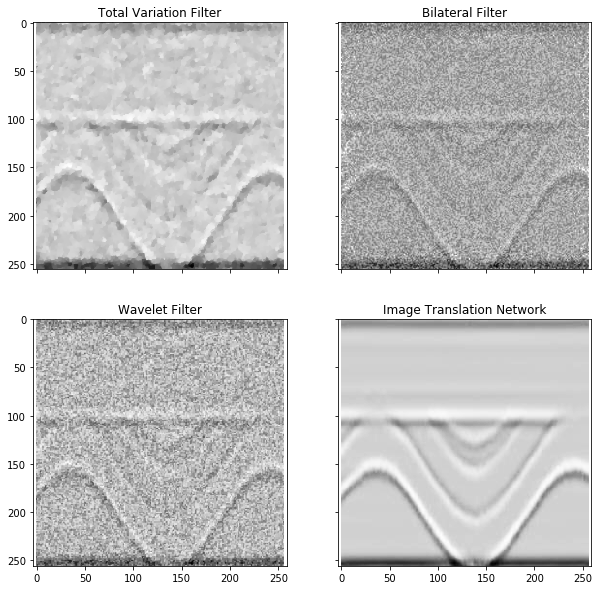

In [6]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))

ax1.imshow(tv[:,:,0], cmap='Greys')
ax1.set_title('Total Variation Filter')
ax2.imshow(bilat[:,:,0], cmap='Greys')
ax2.set_title('Bilateral Filter')
ax3.imshow(wavelet[:,:,0], cmap='Greys')
ax3.set_title('Wavelet Filter')
ax4.imshow(temp_out[:,:,0], cmap='Greys')
ax4.set_title('Image Translation Network')

plt.show()

## Loss calculation

In [7]:
target = (temp_tar[:,:,0] - temp_tar[:,:,0].min()) / temp_tar[:,:,0].max()
output = (temp_out[:,:,0] - temp_out[:,:,0].min()) / temp_out[:,:,0].max()

In [8]:
loss = lambda x, y : np.sum(abs(x-y))

In [ ]:
print('pix2pix = ', loss(target, output))
print('Total variation = ', loss(target, tv[:,:,0]))
print('Bilateral = ', loss(target, bilat[:,:,0]))
print('Wavelet = ', loss(target, wavelet[:,:,0]))

pix2pix =  1436.75396963
Total variation =  7503.60312238
Bilateral =  7798.59092031
Wavelet =  7797.77078535


In [ ]:
%%time

losses = []
outnames = glob.glob(''.join((otfold, '/*')))
tarnames = glob.glob(''.join((trfold, '/*')))

loss = lambda x, y : np.sum(abs(x-y))

for i in range(len(outnames)):
    target = img.imread(tarnames[i])[:,:,0]
    output = img.imread(outnames[i])[:,:,0]
    
    target = (target - target.min()) / target.max()
    output = (output - output.min()) / output.max()

    tv = denoise_tv_chambolle(temp_in, weight=0.1, multichannel=True)[:,:,0]
    bilat = denoise_bilateral(temp_in, sigma_color=0.05, sigma_spatial=15,
                multichannel=True)[:,:,0]
    wavelet = denoise_wavelet(temp_in, multichannel=True)[:,:,0]
    
    losses.append([loss(target, output), loss(target, tv), loss(target, bilat), loss(target, wavelet)])